In [2]:
import pandas as pd
import geopandas as gpd
import netCDF4 as nc
from scipy.io import netcdf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import os
from math import pi
import datetime
import rioxarray
from shapely.geometry import mapping
from shapely.geometry import Point
import rasterio

## Explore data
#### Data are predicted. For each file I select the 24steps with the next date. There are 24 images with size 400*480.

In [ ]:
test1 = xr.open_dataset('C:\\Users\\User\\Documents\\Projects_2022\\Perifereia_Attikis_2021_2024\\Phase4\\Hazard\\meteo\\WRF-20220601.grb2', engine='cfgrib')
test2 = test1.isel(step= slice(12,36))
test2
#test2 = test1.sel(step='name of value') e.g. test2 = test1.sel(time='2022-05-27T12:00:00.000000000')

In [ ]:
test2.time.values

#### Select the temperature values.

In [ ]:
test2.t2m.values 
#or 
#test2.t2m.values[:,:,:] #[step, latitude, longitude]

#### Select the first step (step=0) for every pixel (lat, lon= :,:).

In [ ]:
test2.t2m.values[0,:,:]

#### Select the first step (step=0) for the pixels with lat 0 and all lon. It is the first row of the previous array.


In [ ]:
test.max_temp.values.shape

In [ ]:
test2.t2m.values[0,0,:]

#### Select the first step (step=0) for the pixels with all lat and lon 0. It is the first column of the pre-previous array or else the first value of each line.

In [ ]:
test2.t2m.values[0,:,0]

#### Select the first step (step=0) for one pixel (lat=0,lon=0).

In [ ]:
test2.t2m.values[0,0,0]
#test2.t2m.values[1,0,300]

#### Select for all the steps (24 images) for one pixel (lat=390,lon=479). There are 24 values in the array.

In [ ]:
test2.t2m.values[:,390,479]

#### Select the max from the previous array, meaning the max temperature in a day for one pixel.

In [ ]:
test2.t2m.values[:,390,479].max()

In [ ]:
test2.t2m.values[0,390,479] #Temperature in one pixel for T00:00:00

#### Calculate the max temperature for every step.

In [ ]:
test3['max_temp']=test2.t2m.max(dim='step')
test3

In [ ]:
test3.max_temp.values

#### Show the max temperature for every step for one pixel. There is no step in max_temp, only (lat, lon).

In [ ]:
test3.max_temp.values[390,479] 

In [ ]:
test3.max_temp.values[:,479]

#### Check data -> As a result the max temperature in a day for each pixel is extracted.

In [ ]:
test2.t2m.values[:,390,479].max()

In [ ]:
test3.max_temp.values[390,479]

In [ ]:
test1.close()

## Processing for all the files/dates. - Convert hourly to daily.

In [3]:
mypath = '/home/sg/Projects/perifereia/p4/wind'

In [3]:
#Check if a file/date is missing
from os.path import exists
for date in datalist:
    print(date)
    file_exists = exists(os.path.join(mypath,'WRF-'+date+'.grb2'))
    if file_exists:
        print (True)
    else:
        print ('The file for ' +date+ ' does not exist')

NameError: name 'datalist' is not defined

In [18]:
#Dates we want
start = datetime.datetime.strptime("20220527", "%Y%m%d")
end = datetime.datetime.strptime("20220930", "%Y%m%d")
date_generated = pd.date_range(start, end)
datelist = date_generated.strftime("%Y%m%d")
datelist

Index(['20220527', '20220528', '20220529', '20220530', '20220531', '20220601',
       '20220602', '20220603', '20220604', '20220605',
       ...
       '20220921', '20220922', '20220923', '20220924', '20220925', '20220926',
       '20220927', '20220928', '20220929', '20220930'],
      dtype='object', length=127)

In [ ]:
#Or else use that
datetime_series = pd.Series(pd.date_range("2022-05-27", periods=127, freq="D"))
datetime_series

In [4]:
file_list = [i for i in os.listdir('/home/sg/Projects/perifereia/p4/raw_data') if i.endswith('2')]

In [6]:
meteo = xr.open_dataset(os.path.join('/home/sg/Projects/perifereia/p4/raw_data',file_list[0]), engine = 'cfgrib')

Ignoring index file '/home/sg/Projects/perifereia/p4/raw_data/WRF-20220309.grb2.923a8.idx' incompatible with GRIB file
skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/s

In [7]:
meteo

<xarray.Dataset>
Dimensions:            (step: 61, latitude: 400, longitude: 480)
Coordinates:
    time               datetime64[ns] ...
  * step               (step) timedelta64[ns] 00:00:00 ... 2 days 12:00:00
    heightAboveGround  float64 ...
  * latitude           (latitude) float64 34.0 34.02 34.04 ... 41.94 41.96 41.98
  * longitude          (longitude) float64 19.2 19.22 19.24 ... 28.76 28.78
    valid_time         (step) datetime64[ns] ...
    surface            float64 ...
Data variables:
    t2m                (step, latitude, longitude) float32 ...
    tp                 (step, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-05-26T12:55 GRIB to CDM+CF via cfgrib-0.9.1...

In [16]:
os.chdir('/home/sg/Projects/perifereia/p4/raw_data')

# for lazaros -- add dew temp

In [35]:
for file in file_list:
    #print(date)
    #list_of_files = [os.path.join(mypath,'WRF-'+date+'.grb2')]
    #print(list_of_files)
    #try:
    meteo = xr.open_dataset(file, engine = 'cfgrib')
    date  = file.split('-')[1].split('.')[0]
    meteo_date = meteo.isel(step= slice(12,36))
    print('Day selected')
    #datetime_series = pd.Series(pd.date_range("2022-05-27", periods=127, freq="D"))
    #for time in datetime_series:
        #meteo_date = meteo_date.assign_coords({'time':time}) #If there is no time dimension, create one
        #print('Time dimension created')
    meteo_date['max_temp'] = meteo_date.t2m.max(dim='step')
    meteo_date['min_temp'] = meteo_date.t2m.min(dim='step')
    meteo_date['mean_temp'] = meteo_date.t2m.mean(dim='step')
    meteo_date['tp_daily'] = meteo_date.tp.sum(dim='step')
    print('Values calculated')
    out = meteo_date[['max_temp','min_temp','mean_temp','tp_daily']]
    out = out.assign_coords({"time": date})
    out = out.expand_dims('time')
    out.to_netcdf('/home/sg/Projects/perifereia/p4/meteo_nc/'+date+"_temp_prec.nc")
    print('File '+date+' saved') #The name of the file saved refers actually to the next day, as they are predicted data.
    #except:
    #    print('error')

skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


File 20220309 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210610 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220615 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210803 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220714 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220819 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210903 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220607 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200718 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210919 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220311 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220429 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210829 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210901 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200713 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200716 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220513 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220909 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211107 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210818 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211130 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220123 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected
Values calculated
File 20220223 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220122 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210716 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220712 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220516 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220103 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220507 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20221005 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200819 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220220 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220618 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200706 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210826 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220105 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220306 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210602 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211201 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211205 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220303 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210607 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200901 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200708 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220801 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220729 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211209 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220327 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211216 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220831 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211123 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210929 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200711 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210608 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210718 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220603 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220630 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211127 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210709 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210823 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211213 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220823 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211110 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220324 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200809 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211125 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210721 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220707 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211026 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200701 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211016 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210902 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210710 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200806 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211215 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211116 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220617 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211229 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220401 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211002 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220418 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220919 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200730 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200727 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220928 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211103 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220523 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220701 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210916 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211112 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220720 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210905 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211012 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211214 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210606 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210805 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220210 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220726 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211210 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220907 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220917 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200818 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220117 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220903 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200811 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220926 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211009 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220225 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220621 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210910 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected
Values calculated
File 20220107 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220211 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210626 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220817 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220224 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200803 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220606 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210609 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220116 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210605 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220624 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211031 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210911 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220908 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210614 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200829 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220124 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210906 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210615 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200728 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220611 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211109 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220201 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210706 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20221010 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220127 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220807 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220921 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210525 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210520 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210924 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200902 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220806 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211217 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200813 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220119 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210703 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220428 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211105 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220305 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210713 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220213 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210620 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220722 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220422 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220804 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220301 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220503 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200817 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211021 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211231 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210625 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211226 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210518 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220112 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211014 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220406 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220902 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210616 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211225 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210524 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220325 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200905 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220906 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220912 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220509 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220627 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220918 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211208 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211108 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220610 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220120 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20221007 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211011 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200820 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210815 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211204 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220331 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220423 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210715 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220718 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220313 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210704 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220706 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected
Values calculated
File 20200703 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220525 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220204 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211001 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200731 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200724 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220104 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220314 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220901 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220628 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220522 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220526 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211228 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220412 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200725 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211129 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220126 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211128 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211219 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220502 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210828 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220728 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220121 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211022 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220426 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220816 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220315 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211224 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220113 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220326 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200822 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220724 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220520 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200709 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220727 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200908 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200823 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210808 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220623 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210801 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220425 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220409 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220504 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211218 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220222 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220411 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211025 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220725 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210630 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220506 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211003 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210918 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220427 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220626 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220408 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220811 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220920 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210702 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211117 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200802 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210722 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210612 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220620 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220809 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210830 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210824 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220131 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210529 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200903 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220402 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220414 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210624 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211126 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220704 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected
Values calculated
File 20210617 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200723 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220517 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220318 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210820 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220328 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200712 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220214 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220911 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210915 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220226 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220202 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220904 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220922 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211115 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220530 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200729 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200714 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220316 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220527 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200721 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220820 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210904 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210806 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected
Values calculated
File 20221004 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220927 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210804 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210519 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200704 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210728 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210604 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220827 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210701 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210730 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220125 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210802 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200705 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220711 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220521 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220616 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211206 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220715 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210909 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220602 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211023 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220106 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211104 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220914 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211207 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220424 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220703 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211122 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200801 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220420 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220519 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211212 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220916 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211018 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210731 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200702 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210724 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200722 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220808 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210723 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220805 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220108 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220528 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220924 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211223 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210908 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220810 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200904 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220608 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210521 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211220 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211124 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210913 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220531 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210930 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210825 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220905 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220913 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220501 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210528 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220717 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220228 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211114 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220405 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210603 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220221 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220302 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211119 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20221001 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210920 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210819 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220830 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220612 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220514 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220604 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220614 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220723 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210522 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220829 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210627 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220320 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210812 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211019 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220317 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220512 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220430 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211017 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220609 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210717 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220407 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210821 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211006 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220929 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211202 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220323 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220308 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211211 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200826 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220613 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220129 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220529 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200719 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200810 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210725 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211020 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20221011 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210711 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210923 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210921 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220216 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200906 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220404 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210925 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220803 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210720 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220730 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210628 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210530 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220524 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211030 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210705 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211230 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220417 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200808 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211121 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220825 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20221009 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200717 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211015 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210811 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220910 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220206 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected
Values calculated
File 20220410 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210729 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20221003 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210926 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210817 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220209 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220217 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220212 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220203 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210807 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210726 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220102 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220322 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220814 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210831 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210822 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211005 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220130 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200907 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220518 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220319 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210712 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211113 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211007 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220219 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210714 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220505 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220818 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220218 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220415 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210813 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220215 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210814 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211024 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200812 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20221002 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210914 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211013 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220930 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200807 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211106 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20221006 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220310 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200707 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220307 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220622 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211102 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220601 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220208 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211111 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220605 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211222 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210526 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210810 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211203 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220111 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220813 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220403 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220713 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210621 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200821 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220515 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220716 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220822 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220511 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220110 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211010 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210927 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210928 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210623 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220815 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220915 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211029 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220128 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211008 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210527 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220821 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220508 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210912 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200805 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200715 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220329 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220114 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210907 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210827 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210629 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220925 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220416 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220109 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220702 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210809 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220510 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220421 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200710 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220629 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200720 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20211101 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210523 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220828 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210601 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20210727 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200815 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220812 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20220824 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20221008 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Values calculated
File 20200814 saved


skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)


Day selected
Values calculated
File 20211028 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220312 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220321 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200804 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20200726 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211227 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220826 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211027 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220227 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220731 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220619 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210816 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210922 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210613 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220115 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220413 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220207 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210707 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220721 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220923 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220205 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210708 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220719 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210917 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211118 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20210622 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220705 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20211221 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220118 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220802 saved


skipping variable: paramId==165 shortName='u10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=2.0) new_value=Variable(dimensions=(), data=10.0)
skipping variable: paramId==166 shortName='v10'
Traceback (most recent call last):
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError:

Day selected
Values calculated
File 20220304 saved


#### For the precipitation parameter we need the sum of total percipitation from the previous 7 days (the amount of water the ground holds prior to a fire incident)

In [44]:
mypath = '/home/sg/Projects/perifereia/p4/meteo_nc/' #Gets the list of all files and directories in a specified directory. 

In [45]:
#Select only the nc files -referring to temperature and precipitation- from a folder
list_of_files = [os.path.join(mypath,i) for i in os.listdir(mypath) if i.endswith('_temp_prec.nc')] 

In [46]:
print(list_of_files)
len(list_of_files)

['/home/sg/Projects/perifereia/p4/meteo_nc/20220521_temp_prec.nc', '/home/sg/Projects/perifereia/p4/meteo_nc/20220512_temp_prec.nc', '/home/sg/Projects/perifereia/p4/meteo_nc/20220506_temp_prec.nc', '/home/sg/Projects/perifereia/p4/meteo_nc/20220522_temp_prec.nc', '/home/sg/Projects/perifereia/p4/meteo_nc/20220501_temp_prec.nc', '/home/sg/Projects/perifereia/p4/meteo_nc/20220509_temp_prec.nc', '/home/sg/Projects/perifereia/p4/meteo_nc/20200905_temp_prec.nc', '/home/sg/Projects/perifereia/p4/meteo_nc/20220210_temp_prec.nc', '/home/sg/Projects/perifereia/p4/meteo_nc/20220818_temp_prec.nc', '/home/sg/Projects/perifereia/p4/meteo_nc/20220404_temp_prec.nc', '/home/sg/Projects/perifereia/p4/meteo_nc/20211230_temp_prec.nc', '/home/sg/Projects/perifereia/p4/meteo_nc/20220209_temp_prec.nc', '/home/sg/Projects/perifereia/p4/meteo_nc/20220110_temp_prec.nc', '/home/sg/Projects/perifereia/p4/meteo_nc/20220612_temp_prec.nc', '/home/sg/Projects/perifereia/p4/meteo_nc/20220120_temp_prec.nc', '/home/sg

561

In [47]:
meteo = xr.open_mfdataset(list_of_files,concat_dim='time', combine='nested') 
#concat_dim='time' --> makes sure that there is a common coordinate to connect files
#combine='nested' --> makes sure that the files open one after another and they are all available for processing

In [48]:
#Create a rolling window of size 7 days along the time dimension and sum over it
rolling_sum = meteo.tp_daily.rolling(time=7, min_periods=1).sum()
#the `min_periods=1` --> ensures that if there are fewer than 7 days of data available for a given date, it will still calculate the rolling sum using the available data.

In [49]:
#Assign the rolling sum to a new variable
meteo['rain_7days'] = rolling_sum

In [54]:
meteo.sel(time=meteo.time.values[0]).expand_dims('time')

<xarray.Dataset>
Dimensions:            (time: 1, latitude: 400, longitude: 480)
Coordinates:
  * time               (time) <U8 '20220521'
    heightAboveGround  float64 2.0
  * latitude           (latitude) float64 34.0 34.02 34.04 ... 41.94 41.96 41.98
  * longitude          (longitude) float64 19.2 19.22 19.24 ... 28.76 28.78
    surface            float64 0.0
Data variables:
    max_temp           (time, latitude, longitude) float32 dask.array<chunksize=(1, 400, 480), meta=np.ndarray>
    min_temp           (time, latitude, longitude) float32 dask.array<chunksize=(1, 400, 480), meta=np.ndarray>
    mean_temp          (time, latitude, longitude) float32 dask.array<chunksize=(1, 400, 480), meta=np.ndarray>
    tp_daily           (time, latitude, longitude) float32 dask.array<chunksize=(1, 400, 480), meta=np.ndarray>
    rain_7days         (time, latitude, longitude) float32 dask.array<chunksize=(1, 400, 480), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-05-16T18:46 GRIB to CDM+CF via cfgrib-0.9.1...

In [55]:
#To save the weekly sum of precipitation for each date
for i in meteo.time.values:
    print(i)
    #meteo = meteo.drop_vars('i') #to delete a coordinate that is not needed
    day = meteo.sel(time=i).expand_dims('time')
    #out = day[['max_temp','min_temp','mean_temp','tp_daily','rain_7days']]
    #print(out)
    #time_name = pd.to_datetime(str(i)).strftime('%Y%m%d')
    #print(time_name)
    out.to_netcdf('/home/sg/Projects/perifereia/p4/meteo_final/'+time_name+"_temp_7Dprec.nc")
    print('File '+time_name+'with temperature and 7days rain saved')

20220521



KeyboardInterrupt



In [58]:
meteo.time.values

array(['20220521', '20220512', '20220506', '20220522', '20220501',
       '20220509', '20200905', '20220210', '20220818', '20220404',
       '20211230', '20220209', '20220110', '20220612', '20220120',
       '20210621', '20220417', '20210715', '20200710', '20200726',
       '20220306', '20220720', '20200817', '20200723', '20211101',
       '20210608', '20211127', '20220825', '20211228', '20210906',
       '20200711', '20211206', '20200713', '20200708', '20210910',
       '20200707', '20220106', '20211220', '20200802', '20210726',
       '20200704', '20210811', '20210818', '20220914', '20210915',
       '20220808', '20200908', '20220806', '20211008', '20220407',
       '20220815', '20220830', '20220412', '20200721', '20220906',
       '20210601', '20200717', '20210925', '20210728', '20220626',
       '20220107', '20210602', '20220903', '20220902', '20220502',
       '20220515', '20220128', '20220608', '20210610', '20220805',
       '20220524', '20220812', '20210810', '20200714', '202208

In [ ]:
meteo.rain_7days[0,:,:].values

In [ ]:
meteo.rain_7days.values

In [ ]:
meteo.rain_7days.values.shape

In [ ]:
meteo.sel(time='2022-06-25T12:00:00.000000000',method='nearest').values
#method='nearest' --> there were no initial data for some dates, so this argument brings the date nearest to the selected one

In [ ]:
meteo.time.values

## Check if data are correct

In [ ]:
initial = xr.open_dataset('C:\\Users\\User\\Documents\\Projects_2022\\Perifereia_Attikis_2021_2024\\Phase4\\Hazard\\meteo\\WRF-20220602.grb2', engine='cfgrib')
first = initial.isel(step= slice(12,36))
first

In [ ]:
first.t2m.values[:,390,479]

In [ ]:
first.t2m.values[:,390,479].max()

In [ ]:
first.close()

In [ ]:
check = xr.open_dataset('C:\\Users\\User\\Documents\\Projects_2022\\Perifereia_Attikis_2021_2024\\Phase4\\Hazard\\meteo\\20220602_temp_prec.nc', engine='netcdf4')
check

In [ ]:
check.max_temp.values[390,479]

In [ ]:
check.close()

In [ ]:
check2 = xr.open_dataset('C:\\Users\\User\\Documents\\Projects_2022\\Perifereia_Attikis_2021_2024\\Phase4\\Hazard\\meteo\\20220602_temp_7Dprec.nc', engine='netcdf4')
check2

In [ ]:
check2.time.values

In [ ]:
check2.rain_7days.values

In [ ]:
check2.rain_7days.shape

In [ ]:
check2.close()

## Features to shapefile

In [4]:
savepath = 'wind_results/'

In [5]:
grid = gpd.read_file('grid/grid.shp')

In [ ]:
len(grid)

In [6]:
#Assign a unique id to each cell in the grid
grid['id'] = range(1,(len(grid)+1))

In [ ]:
#grid = grid.explode(ignore_index=True, index_parts=None)
grid

In [7]:
grid.drop(columns=['OBJECTID','OBJECTID_1','PageName','PageNumber','ORIG_FID'], inplace=True)

In [8]:
grid = grid.astype({'id':'int'}) #to remove any decimals

In [9]:
grid

,id,geometry
0,1,POINT (5526320.597 1794732.905)
1,2,POINT (5526419.457 1794751.227)
2,3,POINT (5526238.063 1794616.378)
3,4,POINT (5526336.923 1794634.700)
4,5,POINT (5526435.784 1794653.021)
...,...,...
46025,46026,POINT (5558069.636 1738478.488)
46026,46027,POINT (5558168.540 1738496.846)
46027,46028,POINT (5558267.445 1738515.204)
46028,46029,POINT (5558366.349 1738533.562)


In [10]:
grid = grid.to_crs('EPSG:4326')
grid

,id,geometry
0,1,POINT (23.75877 38.25438)
1,2,POINT (23.75991 38.25438)
2,3,POINT (23.75763 38.25347)
3,4,POINT (23.75877 38.25347)
4,5,POINT (23.75991 38.25348)
...,...,...
46025,46026,POINT (24.01014 37.70123)
46026,46027,POINT (24.01127 37.70123)
46027,46028,POINT (24.01241 37.70123)
46028,46029,POINT (24.01354 37.70123)


In [11]:
#Check crs of the grid shapefile
print("CRS: {}".format(grid.crs))

CRS: EPSG:4326


In [12]:
print(grid.geometry.centroid.x)
grid.geometry.centroid.y

/tmp/ipykernel_197644/4020343509.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(grid.geometry.centroid.x)
/tmp/ipykernel_197644/4020343509.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid.geometry.centroid.y


0        23.758767
1        23.759910
2        23.757627
3        23.758770
4        23.759913
           ...    
46025    24.010137
46026    24.011272
46027    24.012406
46028    24.013541
46029    24.014675
Length: 46030, dtype: float64


0        38.254376
1        38.254378
2        38.253472
3        38.253475
4        38.253477
           ...    
46025    37.701232
46026    37.701232
46027    37.701232
46028    37.701232
46029    37.701232
Length: 46030, dtype: float64

In [13]:
#Assign the xy from geometry in separate columns
grid['longitude'] = grid.geometry.centroid.x
grid['latitude'] = grid.geometry.centroid.y
grid

/tmp/ipykernel_197644/2190482172.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid['longitude'] = grid.geometry.centroid.x
/tmp/ipykernel_197644/2190482172.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid['latitude'] = grid.geometry.centroid.y


,id,geometry,longitude,latitude
0,1,POINT (23.75877 38.25438),23.758767,38.254376
1,2,POINT (23.75991 38.25438),23.759910,38.254378
2,3,POINT (23.75763 38.25347),23.757627,38.253472
3,4,POINT (23.75877 38.25347),23.758770,38.253475
4,5,POINT (23.75991 38.25348),23.759913,38.253477
...,...,...,...,...
46025,46026,POINT (24.01014 37.70123),24.010137,37.701232
46026,46027,POINT (24.01127 37.70123),24.011272,37.701232
46027,46028,POINT (24.01241 37.70123),24.012406,37.701232
46028,46029,POINT (24.01354 37.70123),24.013541,37.701232


In [ ]:
#Print xy from geometry
for point in grid['geometry']:
    print(point.xy[0][0],point.xy[1][0])

In [14]:
points = grid[['longitude','latitude']]
points

,longitude,latitude
0,23.758767,38.254376
1,23.759910,38.254378
2,23.757627,38.253472
3,23.758770,38.253475
4,23.759913,38.253477
...,...,...
46025,24.010137,37.701232
46026,24.011272,37.701232
46027,24.012406,37.701232
46028,24.013541,37.701232


NameError: name 'check2' is not defined

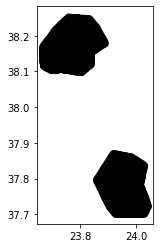

In [15]:
#Plot one variable from the nc meteodata files in comparison with the grid shapefile
ax = grid.plot(alpha=0.2, color='black')
check2.max_temp.plot(ax=ax,zorder=-1)

In [ ]:
#Clip to extent of grid shapefile after changing crs to the nc file and plot it
check2 = check2.rio.write_crs('EPSG:4326')
clipped = check2.rio.clip(grid.geometry.apply(mapping), grid.crs)
f, ax = plt.subplots(figsize=(10, 4))
clipped.max_temp.plot(ax=ax)
ax.set(title="NC Layer Cropped to Geodataframe Extent")
ax.set_axis_off()
plt.show()

NameError: name 'clipped' is not defined

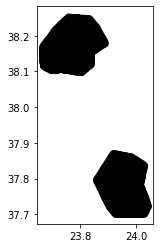

In [16]:
#Plot the clipped (to the extent of the grid shapefile) nc file in comparison to the grid shapefile
ax = grid.plot(alpha=0.2, color='black')
clipped.max_temp.plot(ax=ax,zorder=-1)

In [ ]:
#Check the process of combining just one nc file with the grid
final = pd.DataFrame([])
for index,row in grid.iterrows():
    print("id:", row.id)
    x = row.longitude
    y = row.latitude
    print(x,y)
    point_maxtemp = clipped.max_temp.sel(longitude=x,latitude=y,method = "nearest").values
    point_maxtemp = float(point_maxtemp)
    point_mintemp = clipped.min_temp.sel(longitude=x,latitude=y,method = "nearest").values
    point_mintemp = float(point_mintemp)
    point_meantemp = clipped.mean_temp.sel(longitude=x,latitude=y,method = "nearest").values
    point_meantemp = float(point_meantemp)
    point_7Drain = clipped.rain_7days.sel(longitude=x,latitude=y,method = "nearest").values
    point_7Drain = float(point_7Drain)
    df = pd.DataFrame(columns=['id', 'x', 'y', 'max_temp', 'min_temp', 'mean_temp', 'rain_7days'], index = [0])
    df['id']=row.id
    df['x']=x
    df['y']=y
    df['max_temp'] = point_maxtemp
    df['min_temp'] = point_mintemp
    df['mean_temp'] = point_meantemp
    df['rain_7days'] = point_7Drain
    #print("id: {} max_temp: {} x: {} y: {}".format(row.id, point_variables, x, y))
    print(df)
    final = pd.concat([final, df],axis=0) #Append every df created for each row
print(final)
final.to_csv((os.path.join(savepath,'final.csv')), index=False)
print('The final csv was created')

In [ ]:
clipped.sel(longitude=23.758767051663387, latitude=38.2543759424724, method='nearest').values #lon,lat from the first row in grid shapefile

In [ ]:
check2.max_temp.shape

In [ ]:
clipped.max_temp.shape

In [ ]:
#Sample of dates to check the process
#datelist = ['20220527','20220528']

In [ ]:
for date in datelist:
    print(date)
    try:
        files = [os.path.join(mypath,date+'_temp_7Dprec.nc')]
        meteodata = xr.open_mfdataset(files)
        #print(meteodata.max_temp.shape)
        #for feat in meteodata.variables:
            #print(feat)
        meteodata = meteodata.rio.write_crs('EPSG:4326')
        clipped = meteodata.rio.clip(grid.geometry.apply(mapping), grid.crs)
        #print(clipped.max_temp.shape)
        #print(clipped)
        final = pd.DataFrame([])
        for index,row in grid.iterrows():
            #print("id:", row.id)
            x = row.longitude
            y = row.latitude
            #print(x,y)
            point_maxtemp = clipped.max_temp.sel(longitude=x,latitude=y,method = "nearest").values
            point_maxtemp = float(point_maxtemp)
            point_mintemp = clipped.min_temp.sel(longitude=x,latitude=y,method = "nearest").values
            point_mintemp = float(point_mintemp)
            point_meantemp = clipped.mean_temp.sel(longitude=x,latitude=y,method = "nearest").values
            point_meantemp = float(point_meantemp)
            point_7Drain = clipped.rain_7days.sel(longitude=x,latitude=y,method = "nearest").values
            point_7Drain = float(point_7Drain)
            df = pd.DataFrame(columns=['id', 'x', 'y', 'date', 'max_temp', 'min_temp', 'mean_temp', 'rain_7days'], index = [0])
            df['id']=row.id
            df['x']=x
            df['y']=y
            #Because data are predicted the date could be changed inside the final csv (date=int(date) and date=date+1)
            df['date']=date
            df['max_temp'] = point_maxtemp
            df['min_temp'] = point_mintemp
            df['mean_temp'] = point_meantemp
            df['rain_7days'] = point_7Drain
            #print("id: {} max_temp: {} x: {} y: {}".format(row.id, point_maxtemp, x, y))
            #print(df)
            final = pd.concat([final, df],axis=0) #Append every df created for each row
        #print(final)
        final.to_csv((os.path.join(savepath,date+'_final.csv')), index=False)
        print('The final csv for '+date+' was created')
    except:
        print('error')

In [ ]:
file

In [22]:
for date in datelist:
    print(date)
#    try:
    if os.path.isfile(os.path.join(savepath,date+'_wind.csv')):
        print('result exists')
        continue
    file = 'wind/'+date+'.nc'
    if not os.path.isfile(file):
        print('file does not exist')
        continue
    meteodata = xr.open_dataset(file)
    #print(meteodata.max_temp.shape)
    #for feat in meteodata.variables:
        #print(feat)
    meteodata = meteodata.rio.write_crs('EPSG:4326')
    clipped = meteodata.rio.clip(grid.geometry.apply(mapping), grid.crs)
    #print(clipped.max_temp.shape)
    #print(clipped)
    final = pd.DataFrame([])
    for index,row in grid.iterrows():
        #print("id:", row.id)
        x = row.longitude
        y = row.latitude
        #print(x,y)
        point_dom_dir = clipped.dom_dir.sel(lon=x,lat=y,method = "nearest").values
        point_dom_dir = int(point_dom_dir)
        point_dom_vel = clipped.dom_vel.sel(lon=x,lat=y,method = "nearest").values
        point_dom_vel = float(point_dom_vel)
        point_res_max = clipped.res_max.sel(lon=x,lat=y,method = "nearest").values
        point_res_max = float(point_res_max)
        point_dir_max = clipped.dir_max.sel(lon=x,lat=y,method = "nearest").values
        point_dir_max = int(point_dir_max)
        df = pd.DataFrame(columns=['id', 'x', 'y', 'date', 'dom_dir', 'dom_vel', 'res_max', 'dir_max'], index = [0])
        df['id']=row.id
        df['x']=x
        df['y']=y
        #Because data are predicted the date could be changed inside the final csv (date=int(date) and date=date+1)
        df['date']=date
        df['dom_dir'] = point_dom_dir
        df['dom_vel'] = point_dom_vel
        df['res_max'] = point_res_max
        df['dir_max'] = point_dir_max
        #print("id: {} max_temp: {} x: {} y: {}".format(row.id, point_maxtemp, x, y))
        #print(df)
        final = pd.concat([final, df],axis=0) #Append every df created for each row
    #print(final)
    final.to_csv((os.path.join(savepath,date+'_wind.csv')), index=False)
    print('The final csv for '+date+' was created')
#    except:
#        print('error')

20220527
result exists
20220528
result exists
20220529
result exists
20220530
result exists
20220531
result exists
20220601
result exists
20220602
result exists
20220603
result exists
20220604
result exists
20220605
result exists
20220606
result exists
20220607
result exists
20220608
result exists
20220609
result exists
20220610
result exists
20220611
result exists
20220612
result exists
20220613
result exists
20220614
result exists
20220615
result exists
20220616
result exists
20220617
result exists
20220618
result exists
20220619
result exists
20220620
result exists
20220621
result exists
20220622
result exists
20220623
result exists
20220624
result exists
20220625
file does not exist
20220626
result exists
20220627
result exists
20220628
result exists
20220629
result exists
20220630
result exists
20220701
result exists
20220702
result exists
20220703
result exists
20220704
result exists
20220705
result exists
20220706
result exists
20220707
result exists
20220708
file does not exist

/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:187: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


The final csv for 20220918 was created
20220919


/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:187: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


The final csv for 20220919 was created
20220920
file does not exist
20220921
file does not exist
20220922
file does not exist
20220923
file does not exist
20220924
file does not exist
20220925
file does not exist
20220926
file does not exist
20220927
file does not exist
20220928
file does not exist
20220929
file does not exist
20220930
file does not exist


In [ ]:
#Change date inside the final csv if the data are predicted
# csv_files = glob.glob(os.path.join(savepath, "*_final.csv"))
# for f in csv_files:
#     df = pd.read_csv(f)
#     #print(df)
#     initialdate = df.date.values[0]
#     print(initialdate)
#     actualdate = initialdate+1
#     print(actualdate)
#     initialdate = int(initialdate)
#     actualdate = int(actualdate)
#     df['date'] = df['date'].replace({initialdate:actualdate})
#     print(df)
#     df.to_csv(f, index=False)

#### Extras

In [ ]:
#Convert from Kelvin to Celsius
from scipy.constants import convert_temperature
import numpy as np
temp_cels = convert_temperature((test.max_temp.values), 'Kelvin', 'Celsius')
temp_cels

In [ ]:
plt.contourf(plot)
plt.colorbar()
#285-312K equals to 12-38Celsius